In [1]:
%matplotlib inline


# Within Session P300

This example shows how to perform a within session analysis on three different
P300 datasets.

We will compare two pipelines :

- Riemannian geometry
- XDAWN with Linear Discriminant Analysis

We will use the P300 paradigm, which uses the AUC as metric.


In [30]:
# Authors: Pedro Rodrigues <pedro.rodrigues01@gmail.com>
#
# License: BSD (3-clause)

import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mne
from mne.decoding import Vectorizer
from pyriemann.estimation import Xdawn, XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import DemonsP300
from moabb.datasets import BNCI2014_009
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import P300

getting rid of the warnings about the future



In [3]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

moabb.set_log_level("info")

## Create Pipelines

Pipelines must be a dict of sklearn pipeline transformer.



In [4]:
pipelines = {}


We have to do this because the classes are called 'Target' and 'NonTarget'
but the evaluation function uses a LabelEncoder, transforming them
to 0 and 1



In [5]:
labels_dict = {"Target": 1, "NonTarget": 0}

pipelines["RG+LDA"] = make_pipeline(
    XdawnCovariances(
        nfilter=2, classes=[labels_dict["Target"]], estimator="lwf", xdawn_estimator="scm"
    ),
    TangentSpace(),
    LDA(solver="lsqr", shrinkage="auto"),
)

pipelines["Xdw+LDA"] = make_pipeline(
    Xdawn(nfilter=2, estimator="scm"), Vectorizer(), LDA(solver="lsqr", shrinkage="auto")
)

## Evaluation

We define the paradigm (P300) and use all three datasets available for it.
The evaluation will return a DataFrame containing a single AUC score for
each subject / session of the dataset, and for each pipeline.

Results are saved into the database, so that if you add a new pipeline, it
will not run again the evaluation unless a parameter has changed. Results can
be overwritten if necessary.



In [21]:
paradigm = P300(resample=128)
print("charging dataset")
dataset = BNCI2014_009()
print(dataset.event_id)
dataset.subject_list = dataset.subject_list[:]
print(dataset.subject_list)
datasets = [dataset]
overwrite = True  # set to True if we want to overwrite cached results
evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)

results = evaluation.process(pipelines)

charging dataset
{'Target': 2, 'NonTarget': 1}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


2023-11-13 10:42:22,970 INFO MainThread moabb.evaluations.base Processing dataset: BNCI2014-009
BNCI2014-009-WithinSession:   0%|          | 0/10 [00:00<?, ?it/s]

No hdf5_path provided, models will not be saved.


2023-11-13 10:42:29,917 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 0: Score 0.921


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:30,956 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 0: Score 0.939


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:35,189 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 1: Score 0.915


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:36,114 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 1: Score 0.939


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:38,487 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 2: Score 0.925


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:39,561 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 2: Score 0.933
BNCI2014-009-WithinSession:  10%|█         | 1/10 [00:16<02:31, 16.83s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:42:46,048 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 0: Score 0.935


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:46,809 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 0: Score 0.944


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:49,403 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 1: Score 0.905


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:50,255 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 1: Score 0.958


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:52,552 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 2: Score 0.933


No hdf5_path provided, models will not be saved.


2023-11-13 10:42:53,386 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 2: Score 0.931
BNCI2014-009-WithinSession:  20%|██        | 2/10 [00:30<02:00, 15.05s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:43:04,173 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 0: Score 0.689


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:04,990 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 0: Score 0.698


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:07,439 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 1: Score 0.905


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:08,257 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 1: Score 0.912


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:10,417 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 2: Score 0.937


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:11,217 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 2: Score 0.947
BNCI2014-009-WithinSession:  30%|███       | 3/10 [00:48<01:54, 16.32s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:43:17,749 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 0: Score 0.925


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:18,505 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 0: Score 0.944


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:20,419 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 1: Score 0.935


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:21,209 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 1: Score 0.936


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:23,272 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 2: Score 0.911


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:23,962 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 2: Score 0.944
BNCI2014-009-WithinSession:  40%|████      | 4/10 [01:01<01:29, 14.90s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:43:31,060 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 0: Score 0.952


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:31,857 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 0: Score 0.967


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:34,060 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 1: Score 0.920


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:35,029 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 1: Score 0.956


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:37,505 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 2: Score 0.936


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:38,404 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 2: Score 0.939
BNCI2014-009-WithinSession:  50%|█████     | 5/10 [01:15<01:13, 14.74s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:43:44,919 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 0: Score 0.845


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:45,640 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 0: Score 0.870


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:47,679 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 1: Score 0.896


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:48,405 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 1: Score 0.907


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:50,373 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 2: Score 0.899


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:51,117 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 2: Score 0.921
BNCI2014-009-WithinSession:  60%|██████    | 6/10 [01:28<00:56, 14.05s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:43:56,866 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 0: Score 0.909


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:57,559 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 0: Score 0.909


No hdf5_path provided, models will not be saved.


2023-11-13 10:43:59,477 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 1: Score 0.922


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:00,201 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 1: Score 0.906


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:02,308 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 2: Score 0.856


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:03,027 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 2: Score 0.875
BNCI2014-009-WithinSession:  70%|███████   | 7/10 [01:40<00:40, 13.35s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:44:08,860 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 0: Score 0.897


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:09,557 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 0: Score 0.918


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:11,485 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 1: Score 0.841


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:12,210 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 1: Score 0.879


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:14,152 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 2: Score 0.815


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:14,868 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 2: Score 0.867
BNCI2014-009-WithinSession:  80%|████████  | 8/10 [01:52<00:25, 12.87s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:44:20,616 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 0: Score 0.960


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:21,307 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 0: Score 0.969


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:23,229 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 1: Score 0.934


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:23,971 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 1: Score 0.973


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:25,909 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 2: Score 0.896


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:26,713 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 2: Score 0.950
BNCI2014-009-WithinSession:  90%|█████████ | 9/10 [02:03<00:12, 12.55s/it]

No hdf5_path provided, models will not be saved.


2023-11-13 10:44:32,587 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 0: Score 0.979


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:33,294 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 0: Score 0.986


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:35,232 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 1: Score 0.966


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:35,955 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 1: Score 0.978


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:37,899 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 2: Score 0.955


No hdf5_path provided, models will not be saved.


2023-11-13 10:44:38,626 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 2: Score 0.964
BNCI2014-009-WithinSession: 100%|██████████| 10/10 [02:15<00:00, 13.59s/it]


## Plot Results

Here we plot the results to compare the two pipelines



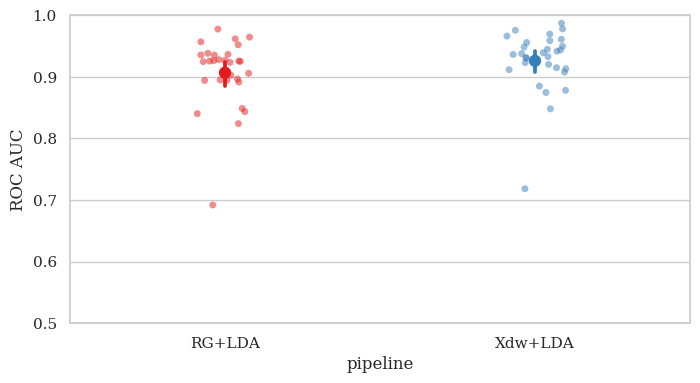

In [7]:
fig, ax = plt.subplots(facecolor="white", figsize=[8, 4])

sns.stripplot(
    data=results,
    y="score",
    x="pipeline",
    ax=ax,
    jitter=True,
    alpha=0.5,
    zorder=1,
    palette="Set1",
)
sns.pointplot(data=results, y="score", x="pipeline", ax=ax, palette="Set1")

ax.set_ylabel("ROC AUC")
ax.set_ylim(0.5, 1)

plt.show()

# Other test 

In [8]:
sessions = dataset.get_data()
print(sessions)

subject = 1
session_name = "0"
run_name = "0"
raw = sessions[subject][session_name][run_name]

print(raw)

{1: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 2: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 3: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 4: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}}, 5: {'0': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '1': {'0': <RawArray | 18 x 50184 (196.0 s), ~6.9 MB, data loaded>}, '2': {'0'

In [10]:
events = mne.find_events(raw,consecutive=True)

print(events)
print(min(events[:,2]))

[[ 1544     0     1]
 [ 1544     0     3]
 [ 1608     0     7]
 ...
 [48520     0    11]
 [48584     0     1]
 [48584     0    14]]
1


In [72]:
X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[1])

print(labels)
print(meta)

['NonTarget' 'NonTarget' 'Target' ... 'NonTarget' 'NonTarget' 'NonTarget']
      subject session run
0           1       0   0
1           1       0   0
2           1       0   0
3           1       0   0
4           1       0   0
...       ...     ...  ..
1723        1       2   0
1724        1       2   0
1725        1       2   0
1726        1       2   0
1727        1       2   0

[1728 rows x 3 columns]


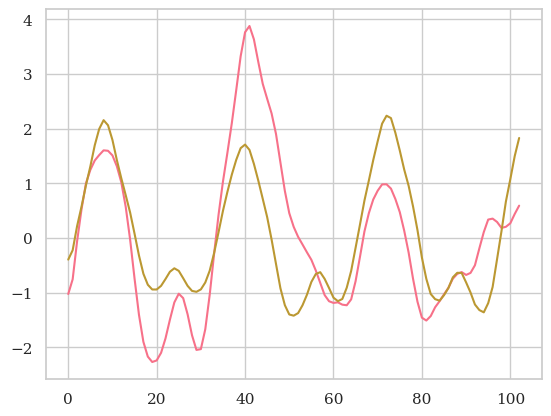

In [74]:
trg_x = np.where(labels=="Target")
avg = np.mean(X[trg_x,0,:][0],axis=0)
ntrg_x = np.where(labels=="NonTarget")
navg = np.mean(X[ntrg_x,0,:][0],axis=0)

plt.plot(avg)
plt.plot(navg)

In [70]:
40/128

0.3125